# Dictionaries and Sets



Any running Python program has many dictionaries active at the same time, even if the
user’s program code doesn’t explicitly use a dictionary.
— A. M. Kuchling
Chapter 18, “Python’s Dictionary Implementation

## Dictionary
- The dict type is not only widely used in our programs but also a fundamental part of the Python implementation.
- Module namespaces, class and instance attributes, and function keyword arguments are some of the fundamental constructs where dictionaries are deployed.
- The built-in functions live in __builtins__.__dict__.
- Hash tables are the engines behind Python’s high-performance dicts.


We also cover sets in this chapter because they are implemented with hash tables as well.
Knowing how a hash table works is key to making the most of dictionaries and sets.

• Common dictionary methods

• Special handling for missing keys

• Variations of dict in the standard library

• The set and frozenset types

• How hash tables work

• Implications of hash tables (key type limitations, unpredictable ordering, etc.)

## Generic Mapping Types

The collections.abc module provides the Mapping and MutableMapping ABCs to formalize the interfaces of dict and similar types

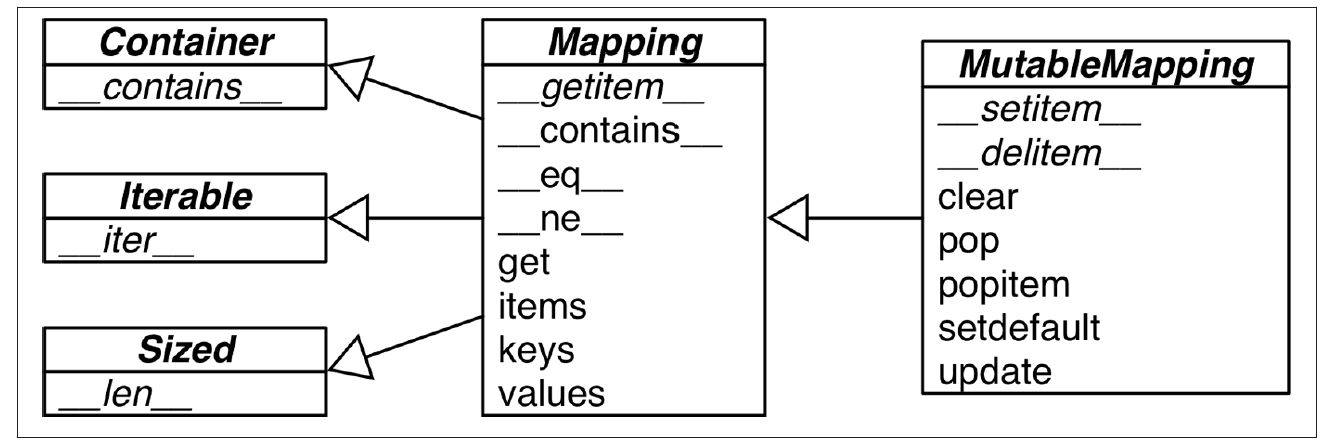

Figure 3-1. UML class diagram for the MutableMapping and its superclasses from collections.
abc (inheritance arrows point from subclasses to superclasses; names in italic
are abstract classes and abstract methods)

- Implementations of specialized mappings often extend dict or collections.User Dict, instead of these ABCs.
- The main value of the ABCs is documenting and formalizing the minimal interfaces for mappings, and serving as criteria for isinstance tests in code that needs to support mappings in a broad sense:

In [1]:
my_dict = {}

In [2]:
isinstance(my_dict, abc.Mapping)

NameError: name 'abc' is not defined

Using isinstance is better than checking whether a function argument is of dict type,
because then alternative mapping types can be used

# Why Key must be hashable?
All mapping types in the standard library use the basic dict in their implementation,
so they share the limitation that the keys must be hashable (the values need not be
hashable, only the keys).

# What is Hashable?

**Python Glossary :**
The default Python prompt of the interactive shell. Often seen for code examples which can be executed interactively in the interpreter.

Here is part of the definition of hashable from the Python Glossary:

```An object is hashable if it has a hash value which never changes during its lifetime (it
needs a __hash__() method), and can be compared to other objects (it needs an
__eq__() method). Hashable objects which compare equal must have the same hash
value. […]```

Note : hashable is a feature of Python objects that tells if the object has a hash value or not.

What is a frozen set?
Frozen set is just an immutable version of a Python set object.

- The atomic immutable types (str, bytes, numeric types) are all hashable
- A frozen set is always hashable, because its elements must be hashable by definition.
- A tuple ishashable only if all its items are hashable





In [2]:
tt = (1, 2, (30, 40))

In [3]:
hash(tt)

8027212646858338501

In [10]:
tl = (1, 2, [30, 40])

In [11]:
hash(tl)

TypeError: unhashable type: 'list'

In [12]:
tf = (1, 2, frozenset([30, 40]))

In [13]:
hash(tf)

985328935373711578

# Why list in Python is unhashable type?

- List cannot be hashed
- Hash values are a numeric constructs that can't change and thus allows to uniquely identify each objects
- Lists are mutable objects and can change over time, hence can't be hashed.

**Note:** At the time of this writing, the Python Glossary states: “All of
Python’s immutable built-in objects are hashable” but that is
inaccurate because a tuple is immutable, yet it may contain references to unhashable objects.

# what are hashable ?

```Note: The data types which are created by the programmers are called 'user-defined' data types. For example, an array, a class, or a module is user-defined data types.```

- User-defined types are hashable by default because their hash value is their id() and they all compare not equal
- If an object implements a custom __eq__ that takes into account its internal state, it may be hashable only if all its attributes are immutable.

Given these ground rules, you can build dictionaries in several ways. The Built-in
Types page in the Library Reference has this example to show the various means of
building a dict:

In [14]:
a = dict(one=1, two=2, three=3)

In [15]:
b = {'one': 1, 'two': 2, 'three': 3}

In [16]:
c = dict(zip(['one', 'two', 'three'], [1, 2, 3]))

In [17]:
d = dict([('two', 2), ('one', 1), ('three', 3)])

In [18]:
e = dict({'three': 3, 'one': 1, 'two': 2})

In [19]:
a == b == c == d == e

True

In addition to the literal syntax and the flexible dict constructor, we can use dict comprehensions
to build dictionaries. See the next section.

# dict Comprehensions

- the syntax of listcomps and genexps was applied to dict comprehensions (and also set comprehensions as well
- A dictcomp builds a dict instance by producing key:value pair from any iterable

Example 3-1 shows the use of
dict comprehensions to build two dictionaries from the same list of tuples.

# Important to Know from programiz website :
The minimal syntax for dictionary comprehension is:

```dictionary = {key: value for vars in iterable}```
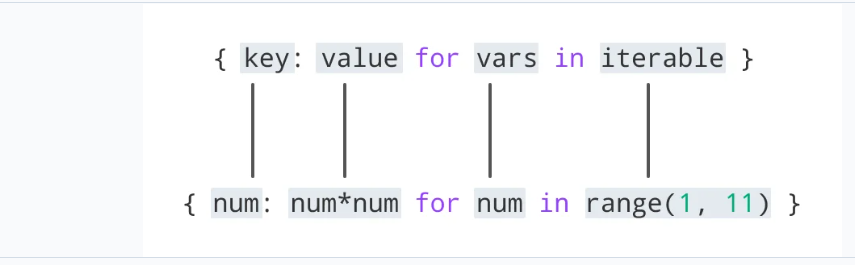


In [18]:
DIAL_CODES = [
(86, 'China'),
(91, 'India'),
(1, 'United States'),
(62, 'Indonesia'),
(55, 'Brazil'),
(92, 'Pakistan'),
(880, 'Bangladesh'),
(234, 'Nigeria'),
(7, 'Russia'),
(81, 'Japan'),
]

In [19]:
[country for country in DIAL_CODES]

[(86, 'China'),
 (91, 'India'),
 (1, 'United States'),
 (62, 'Indonesia'),
 (55, 'Brazil'),
 (92, 'Pakistan'),
 (880, 'Bangladesh'),
 (234, 'Nigeria'),
 (7, 'Russia'),
 (81, 'Japan')]

In [33]:
country_code = {country: code for code, country in DIAL_CODES}

In [34]:
country_code

{'China': 86,
 'India': 91,
 'United States': 1,
 'Indonesia': 62,
 'Brazil': 55,
 'Pakistan': 92,
 'Bangladesh': 880,
 'Nigeria': 234,
 'Russia': 7,
 'Japan': 81}

In [22]:
reverse_country_code= {code:country for code,country in DIAL_CODES}

In [24]:
reverse_country_code

{86: 'China',
 91: 'India',
 1: 'United States',
 62: 'Indonesia',
 55: 'Brazil',
 92: 'Pakistan',
 880: 'Bangladesh',
 234: 'Nigeria',
 7: 'Russia',
 81: 'Japan'}

In [63]:
{code: country.upper() for country, code in country_code.items() if code < 66}

{1: 'UNITED STATES', 62: 'INDONESIA', 55: 'BRAZIL', 7: 'RUSSIA'}

In [67]:
country_code1 = {country1: code1 for code1,  country1 in country_code.items()}

In [68]:
country_code1

{86: 'China',
 91: 'India',
 1: 'United States',
 62: 'Indonesia',
 55: 'Brazil',
 92: 'Pakistan',
 880: 'Bangladesh',
 234: 'Nigeria',
 7: 'Russia',
 81: 'Japan'}

In [38]:
{code2: country2  for country2, code2 in country_code.items()}

{86: 'China',
 91: 'India',
 1: 'United States',
 62: 'Indonesia',
 55: 'Brazil',
 92: 'Pakistan',
 880: 'Bangladesh',
 234: 'Nigeria',
 7: 'Russia',
 81: 'Japan'}

In [23]:
country_code2

{'China': 86,
 'India': 91,
 'United States': 1,
 'Indonesia': 62,
 'Brazil': 55,
 'Pakistan': 92,
 'Bangladesh': 880,
 'Nigeria': 234,
 'Russia': 7,
 'Japan': 81}

In [69]:
  {tom: jerry for jerry, tom in country_code.items()}

{86: 'China',
 91: 'India',
 1: 'United States',
 62: 'Indonesia',
 55: 'Brazil',
 92: 'Pakistan',
 880: 'Bangladesh',
 234: 'Nigeria',
 7: 'Russia',
 81: 'Japan'}

In [59]:
country_code.items()

dict_items([('China', 86), ('India', 91), ('United States', 1), ('Indonesia', 62), ('Brazil', 55), ('Pakistan', 92), ('Bangladesh', 880), ('Nigeria', 234), ('Russia', 7), ('Japan', 81)])

In [54]:
country_code.items()

dict_items([('China', 86), ('India', 91), ('United States', 1), ('Indonesia', 62), ('Brazil', 55), ('Pakistan', 92), ('Bangladesh', 880), ('Nigeria', 234), ('Russia', 7), ('Japan', 81)])

In [60]:
  {jerry: tom for tom, jerry in country_code.items()}

{86: 'China',
 91: 'India',
 1: 'United States',
 62: 'Indonesia',
 55: 'Brazil',
 92: 'Pakistan',
 880: 'Bangladesh',
 234: 'Nigeria',
 7: 'Russia',
 81: 'Japan'}


# List Comprehension 

List comprehension offers a shorter syntax when you want to create a new list based on the values of an existing list.

## The Syntax
newlist = [expression for item in iterable if condition == True]



In [2]:
fruits = ["apple", "banana", "cherry", "kiwi", "mango"]

newlist = [x for x in fruits if "a" in x]

In [3]:
newlist

['apple', 'banana', 'mango']

In [9]:
[x.upper() for x in fruits]

['APPLE', 'BANANA', 'CHERRY', 'KIWI', 'MANGO']

In [11]:
# Return "orange" instead of "banana":
[x if x != "banana" else "orange" for x in fruits] 

['apple', 'orange', 'cherry', 'kiwi', 'mango']

# Overview of Common Mapping Methods

# Default Dict
- Defaultdict is a container like dictionaries present in the module collections. 
- Defaultdict is a sub-class of the dictionary class that returns a dictionary-like object. 
- The functionality of both dictionaries and defaultdict are almost same except for the fact that defaultdict never raises a KeyError. It provides a default value for the key that does not exists.


 

In [26]:
from collections import defaultdict
  
  
# Function to return a default
# values for keys that is not
# present
def def_value():
    return "Not Present"
      
# Defining the dict
d = defaultdict(def_value)
d["a"] = 1
d["b"] = 2
  
print(d["a"])
print(d["b"])
print(d["c"])

1
2
Not Present


# OrderedDict
- An OrderedDict is a dictionary subclass that remembers the order that keys were first inserted. 
- The only difference between dict() and OrderedDict() is that:

```OrderedDict preserves the order in which the keys are inserted. A regular dict doesn’t track the insertion order and iterating it gives the values in an arbitrary order. By contrast, the order the items are inserted is remembered by OrderedDict.```


In [33]:

# normal dict
d = {}
d['a'] = 1
d['b'] = 2
d['c'] = 3
d['d'] = 4

In [28]:

# normal dict
for key, value in d.items():
    print(key, value)

a 1
b 2
c 3
d 4


In [34]:

# normal dict
d['ç']=5
for key, value in d.items():
    print(key, value)

a 1
b 2
c 3
d 4
ç 5


In [36]:
d['c']

3

In [40]:
d.keys()

dict_keys(['a', 'b', 'c', 'd', 'ç'])

In [32]:
from collections import OrderedDict
print("Before:\n")
od = OrderedDict()
od['a'] = 1
od['b'] = 2
od['c'] = 3
od['d'] = 4
for key, value in od.items():
    print(key, value)
 
print("\nAfter:\n")
od['c'] = 5
for key, value in od.items():
    print(key, value)

Before:

a 1
b 2
c 3
d 4

After:

a 1
b 2
c 5
d 4


Table 3-1. Methods of the mapping types dict, collections.defaultdict, and collections.
OrderedDict (common object methods omitted for brevity); optional arguments
are enclosed in […]
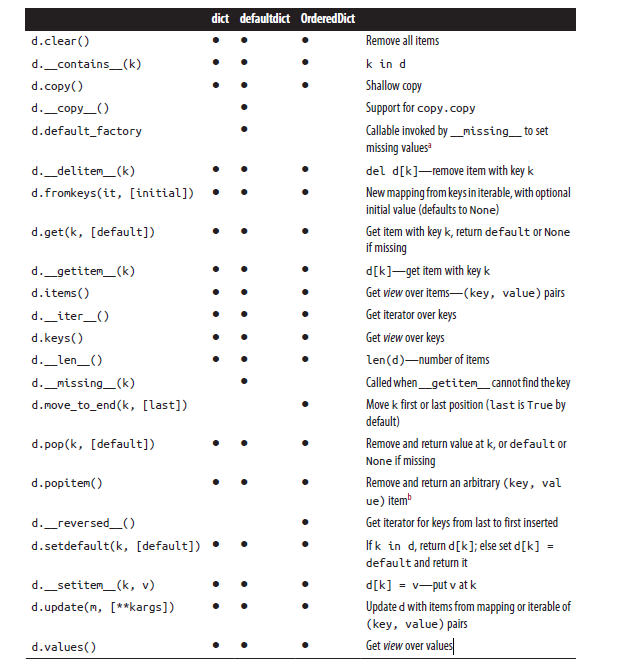
 

**Note : A default_factory is not a method, but a callable instance attribute set by the end user when defaultdict is instantiated.
b OrderedDict.popitem() removes the first item inserted (FIFO); an optional last argument, if set to True, pops the
last item (LIFO).**

## d.update(m,[**kwargs])
The way update handles its first argument m is a prime example of duck typing:
- it first checks whether m has a keys method and, if it does, assumes it is a mapping.
- Otherwise,update falls back to iterating over m, assuming its items are (key, value) pairs.

***The constructor for most Python mappings uses the logic of update internally, which means
they can be initialized from other mappings or from any iterable object producing (key,
value) pairs.***

```A subtle mapping method is setdefault.```

# Handling Missing Keys with setdefault

- In line with the fail-fast philosophy, dict access with d[k] raises an error when k is not an existing key
-  d.get(k, default) is an alternative to d[k] whenever a default value is more convenient than handling KeyError
- 

In [41]:
d = {}
d['a'] = 1
d['b'] = 2
d['c'] = 3
d['d'] = 4

In [46]:
# d.get(k, default)
d.get('a','hi')

1

Example 3-2. index0.py uses dict.get to fetch and update a list of word occurrences from
the index (a better solution is in Example 3-4)

In [51]:
"""Build an index mapping word -> list of occurrences"""
import sys
import re
WORD_RE = re.compile('\w+')
index = {}


In [53]:
sys.argv[1]

'-f'

In [66]:
!python test.ipynb Hello Python 

Traceback (most recent call last):
  File "test.ipynb", line 5, in <module>
    "execution_count": null,
NameError: name 'null' is not defined


In [62]:
print ("This is the name of the script: ", sys.argv[1])

This is the name of the script:  -f


In [52]:
with open(sys.argv[1], encoding='utf-8') as fp:
    for line_no, line in enumerate(fp, 1):
        for match in WORD_RE.finditer(line):
            word = match.group()
            column_no = match.start()+1
            location = (line_no, column_no)
            # this is ugly; coded like this to make a point
            occurrences = index.get(word, [])
            occurrences.append(location)
            index[word] = occurrences

FileNotFoundError: [Errno 2] No such file or directory: '-f'

In [50]:
# print in alphabetical order
for word in sorted(index, key=str.upper):
print(word, index[word])

IndentationError: expected an indented block (<ipython-input-50-8aa8e51284b4>, line 3)